<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook
import json
import csv
from datetime import date
from datetime import datetime
import time

In [ ]:
# Install Libraries
!pip install pycountry

In [ ]:
!pip install langdetect

In [4]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [118]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/twitter_analysis'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [116]:
consumer_key="5iwJ0kh5IkWudh2kXbbV0s5eM"
consumer_secret="DSZGordR8WpGbNJbxwEwMBvJ4E4RJRbemzLQ0vpVArAzSuoLqY"
access_token="799815406462652416-V4f33Mp2G81GeSLeWVHQgGtp2djIuyK"
access_token_secret="UH4iGaQhmNiKVeo2scTmgZneTQuRDR10SSoyivGS0qU0K"


auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [125]:
# Helper function to get all tweets of a specified user
# NOTE:This method only allows access to the most recent 3200 tweets
# Source: https://gist.github.com/yanofsky/5436496
def get_all_tweets(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  new_tweets = api.user_timeline(screen_name = screen_name,count=200, lang = "en")
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  # keep grabbing tweets until there are no tweets left
  while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest, lang = "en")
    #just if lan tweetes 
    # save most recent tweets
    
    alltweets.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  outtweets = [[tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count,
                tweet.retweeted, tweet.user.location, tweet.lang, screen_name] 
               for tweet in alltweets]
  # write the csv
  with open(path + '/%s_tweets_en.csv' % screen_name, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["tweet_id","created_at","text","likes","retweeted", "location", "language" , "airline"])
    writer.writerows(outtweets)
  pass

In [ ]:
get_all_tweets("Saudi_airlines")

In [6]:
saudia_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/Saudi_airlines_tweets.csv")

In [7]:
saudia_airlines.sample(10)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
705,1331011084690579456,2020-11-23 23:05:46,@AmjadALShahrany عليكم السلام ضيفنا العزيز، يرجي أرسال رقم التذكرة الاكترونية عبر الخاص لنتمكن ...,0,False,Saudi Arabia,ar,Saudi_airlines
2175,1323627291705024513,2020-11-03 14:05:12,@mude_jxp ضيفنا العزيز، تم الرد عبر الخاص,0,False,Saudi Arabia,ar,Saudi_airlines
2144,1323682878153175040,2020-11-03 17:46:05,"@abdulsa35722850 @MohdKhu12784812 Dear guest, there is no flight from India to Saudi Arabia at t...",1,False,Saudi Arabia,en,Saudi_airlines
1235,1328348163107926016,2020-11-16 14:44:16,"@Dharmen42542636 Dear guest, there is no flight from India to Saudi Arabia at this time. Kindly ...",0,False,Saudi Arabia,en,Saudi_airlines
116,1334893773160112134,2020-12-04 16:14:11,@ae_707x وعليكم السلام ضيفنا العزيز، في حال جدولتها سيتم الإعلان عن ذلك. شكرا,0,False,Saudi Arabia,ar,Saudi_airlines
533,1332126493598691330,2020-11-27 00:58:00,@GEgBlzbnB2eQhia وعليكم السلام ضيفنا العزيز ، نأمل منك تزويدنا برقم التذكرة الإلكترونية والذي يب...,0,False,Saudi Arabia,ar,Saudi_airlines
133,1334856776152461312,2020-12-04 13:47:10,"@oxamakhalyd Dear guest, we sincerely apologize for any inconvenience you have faced. You can fi...",0,False,Saudi Arabia,en,Saudi_airlines
2443,1322577446877757441,2020-10-31 16:33:30,"@MohdKhu12784812 Dear guest, Kindly check the flights schedule on https://t.co/WjcVaRgoVw and ch...",0,False,Saudi Arabia,en,Saudi_airlines
2533,1322269051696144384,2020-10-30 20:08:03,"@arnabsarka18 Dear guest, Kindly check the flights schedule on https://t.co/AnD1Tc8gpl and choos...",0,False,Saudi Arabia,en,Saudi_airlines
768,1330579792387780615,2020-11-22 18:31:58,"@FurkanK79708161 Welcome dear guest, the flights from India still suspended. We will announce on...",1,False,Saudi Arabia,en,Saudi_airlines


In [77]:
get_all_tweets("flynas")

getting tweets before 1333803986864857088
...400 tweets downloaded so far
getting tweets before 1331903679733977088
...600 tweets downloaded so far
getting tweets before 1330055167807549446
...800 tweets downloaded so far
getting tweets before 1328180460221059071
...1000 tweets downloaded so far
getting tweets before 1326192459039338495
...1200 tweets downloaded so far
getting tweets before 1324406303817609218
...1400 tweets downloaded so far
getting tweets before 1322929543569678335
...1600 tweets downloaded so far
getting tweets before 1321350527469367295
...1800 tweets downloaded so far
getting tweets before 1319797682727170049
...2000 tweets downloaded so far
getting tweets before 1318201592693329920
...2200 tweets downloaded so far
getting tweets before 1316789074557100033
...2400 tweets downloaded so far
getting tweets before 1315389871813464063
...2600 tweets downloaded so far
getting tweets before 1314166213241700353
...2800 tweets downloaded so far
getting tweets before 131273

In [169]:
flynas_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/flynas_tweets.csv")

In [61]:
flynas_airlines.sample(10)

,id,created_at,text,likes,in reply to,retweeted,location,language
2829,1312469651083853824,2020-10-03 19:08:43,"@Mehtab0000786 Hello dear, provide us with you...",0,Mehtab0000786,False,Saudi Arabia,en
719,1328838370856984577,2020-11-17 23:12:10,@A_F_Alanzi وعليكم السلام ، يرجى تزويدنا برقم ...,0,A_F_Alanzi,False,Saudi Arabia,ar
1862,1319281845918265347,2020-10-22 14:17:57,ايش الأغراض اللي ماتقدر تسافر بدونها ؟ 👀\n\n#ط...,14,NaN,False,Saudi Arabia,ar
1239,1324001912254091270,2020-11-04 14:53:49,@hatemamreet مرحبا، تم الرد في الخاص .,0,hatemamreet,False,Saudi Arabia,ar
2943,1311701994210549760,2020-10-01 16:18:20,@A_thobaiti وعليكم السلام، يسمح بحمله فقط داخل...,0,A_thobaiti,False,Saudi Arabia,ar
1768,1320018351800930306,2020-10-24 15:04:34,@ii_il15 حياك الله ، تم الرد من خلال الخاص . ش...,0,ii_il15,False,Saudi Arabia,ar
306,1332817897144594432,2020-11-28 22:45:23,@sale_b0b تم الرد عبر الخاص,0,sale_b0b,False,Saudi Arabia,ar
2387,1315536164716261377,2020-10-12 06:13:57,@Asamjh11123 حياك الله،تابعنا وسيتم الإعلان عن...,0,Asamjh11123,False,Saudi Arabia,ar
2785,1312782872001085443,2020-10-04 15:53:21,@kmell4411 مرحبا، تابعنا بإستمرار وسيتم الإعلا...,0,kmell4411,False,Saudi Arabia,ar
2650,1313770948017958914,2020-10-07 09:19:37,@MecFawzi حياك الله ،رحلاتنا من مطار الملك عبد...,0,MecFawzi,False,Saudi Arabia,ar


In [92]:
len(saudia_airlines[saudia_airlines.language == "en"])

1464

In [94]:
len(flynas_airlines[flynas_airlines.language == "en"])

219

In [8]:
saudia_airlines_en = saudia_airlines[saudia_airlines.language == "en"]

In [9]:
saudia_airlines_en.head()

,tweet_id,created_at,text,likes,retweeted,location,language,airline
14,1335393841810202624,2020-12-06 01:21:16,"@Mohamme43723700 Dear guest, there is no flight from India to Saudi Arabia at this time. Kindly ...",1,False,Saudi Arabia,en,Saudi_airlines
23,1335337522738720770,2020-12-05 21:37:29,"@khalidwhd Hello dear guest, we hope you check and be informed of travel updates due to the Coro...",1,False,Saudi Arabia,en,Saudi_airlines
29,1335334320014315521,2020-12-05 21:24:45,"@JailanShair Hello dear guest, please provide us with the booking number through the direct mess...",0,False,Saudi Arabia,en,Saudi_airlines
38,1335322063851167748,2020-12-05 20:36:03,"@Shakeel60633858 Dear guest, there is no flight from India to Saudi Arabia at this time. When fl...",1,False,Saudi Arabia,en,Saudi_airlines
43,1335314759588122626,2020-12-05 20:07:02,"@AliAnsari079348 Hello dear guest, You can follow up the flights schedule in our website https:/...",1,False,Saudi Arabia,en,Saudi_airlines


In [173]:
flynas_airlines_en = flynas_airlines[flynas_airlines.language == "en"]

In [174]:
flynas_airlines_en.head()

,tweet_id,created_at,text,likes,retweeted,location,language,airline
2,1335581954213900288,2020-12-06 13:48:46,"@dhanraj_parmar Hello, kindly provide us with your booking number on private message",0,False,Saudi Arabia,en,flynas
17,1335517244978245632,2020-12-06 09:31:38,"@Ansar34237667 Hello, please provide us with your reservation number via the private. Please",0,False,Saudi Arabia,en,flynas
19,1335515818642255873,2020-12-06 09:25:58,"@_lulzz Hello, kindly provide us with your booking number on private message https://t.co/Hgn8z1...",0,False,Saudi Arabia,en,flynas
51,1335109047671001088,2020-12-05 06:29:36,"@aliarum44 Hi, kindly keep following us continuously, any new flights will be announced as soon ...",0,False,Saudi Arabia,en,flynas
65,1334936896925995009,2020-12-04 19:05:32,"@afsarmohd78 God bless you, follow us and an announcement will be made when any new trips are av...",0,False,Saudi Arabia,en,flynas


total number:  1464
positive number:  1429
negative number:  28
neutral number:  7


In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

#Cleaning the text

In [19]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub(r'\d', '', text)
 text = "".join([word.lower() for word in text if word not in string.punctuation])
 
 return text

In [20]:
# Clean the tweets
saudia_airlines_en["text"] = saudia_airlines_en["text"].apply(cleanTxt)

# Show the cleaned tweets
saudia_airlines_en

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to saudi arabia at this time kindly follow the flights…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f...","[, dear, guest, flight, india, saudi, arabia, time, kindly, follow, flights, ]","[, dear, guest, flight, india, saudi, arabia, time, kindli, follow, flight, ]"
23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be informed of travel updates due to the corona virus co...,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, updates, due, to, th...","[, hello, dear, guest, hope, check, informed, travel, updates, due, corona, virus, covid, ]","[, hello, dear, guest, hope, check, inform, travel, updat, due, corona, viru, covid, ]"
29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the booking number through the direct message to let yo...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, please, provide, us, with, the, booking, number, through, the, direct, me...","[, hello, dear, guest, please, provide, us, booking, number, direct, message, let, know, thank]","[, hello, dear, guest, pleas, provid, us, book, number, direct, messag, let, know, thank]"
38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to saudi arabia at this time when flights schedule back…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, flight, india, saudi, arabia, time, flights, schedule, back, ]","[, dear, guest, flight, india, saudi, arabia, time, flight, schedul, back, ]"
43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flights schedule in our website …,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, you, can, follow, up, the, flights, schedule, in, our, website, ]","[, hello, dear, guest, follow, flights, schedule, website, ]","[, hello, dear, guest, follow, flight, schedul, websit, ]"
...,...,...,...,...,...,...,...,...,...,...,...
3225,1320352707732000768,2020-10-25 13:13:11,dear guest kindly check the flights schedule on and choose flights info…,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, kindly, check, the, flights, schedule, on, and, choose, flights, info, ]","[, dear, guest, kindly, check, flights, schedule, choose, flights, info, ]","[, dear, guest, kindli, check, flight, schedul, choos, flight, info, ]"
3226,1320352682104729600,2020-10-25 13:13:05,dear guest kindly check the flights schedule on and choose flights info…,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, kindly, check, the, flights, schedule, on, and, choose, flights, info, ]","[, dear, guest, kindly, check, flights, schedule, choose, flights, info, ]","[, dear, guest, kindli, check, flight, schedul, choos, flight, info, ]"
3227,1320352661305237507,2020-10-25 13:13:00,dear guest kindly check the flights schedule on and choose flights info t…,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, kindly, check, the, flights, schedule, on, and, choose, flights, info, t, ]","[, dear, guest, kindly, check, flights, schedule, choose, flights, info, ]","[, dear, guest, kindli, check, flight, schedul, choos, flight, info, ]"
3229,1320339013727899648,2020-10-25 12:18:46,once the flights resumed it will show in our website and you can book your flight residents wit...,0,False,Saudi Arabia,en,Saudi_airlines,"[, once, the, flights, resumed, it, will, show, in, our, website, and, you, can, book, your, fli...","[, flights, resumed, show, website, book, flight, residents, ex, ]","[, flight, resum, show, websit, book, flight, resid, ex, ]"


In [21]:
def tokenization(text):
    text = re.split('\W+', text)
    return text


In [22]:

saudia_airlines_en['Tweet_tokenized'] = saudia_airlines_en['text'].apply(lambda x: tokenization(x.lower()))
saudia_airlines_en.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to saudi arabia at this time kindly follow the flights…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f...","[, dear, guest, flight, india, saudi, arabia, time, kindly, follow, flights, ]","[, dear, guest, flight, india, saudi, arabia, time, kindli, follow, flight, ]"
23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be informed of travel updates due to the corona virus co...,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, updates, due, to, th...","[, hello, dear, guest, hope, check, informed, travel, updates, due, corona, virus, covid, ]","[, hello, dear, guest, hope, check, inform, travel, updat, due, corona, viru, covid, ]"
29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the booking number through the direct message to let yo...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, please, provide, us, with, the, booking, number, through, the, direct, me...","[, hello, dear, guest, please, provide, us, booking, number, direct, message, let, know, thank]","[, hello, dear, guest, pleas, provid, us, book, number, direct, messag, let, know, thank]"
38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to saudi arabia at this time when flights schedule back…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, flight, india, saudi, arabia, time, flights, schedule, back, ]","[, dear, guest, flight, india, saudi, arabia, time, flight, schedul, back, ]"
43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flights schedule in our website …,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, you, can, follow, up, the, flights, schedule, in, our, website, ]","[, hello, dear, guest, follow, flights, schedule, website, ]","[, hello, dear, guest, follow, flight, schedul, websit, ]"


Identified few more words to be removed along with English stopwords

In [15]:
english = (['dear', 'guest', 'woman', 'flight', 'India','Saudi Arabia','Time', 'Follow', 'Kindly', 'hello', 'website'])

In [16]:
stopword = nltk.corpus.stopwords.words('english')

#did not work 

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
saudia_airlines_en['Tweet_nonstop'] = saudia_airlines_en['text'].apply(lambda x: remove_stopwords(x))
saudia_airlines_en.head(10)

Removing Short Words

In [25]:
#saudia_airlines_en['tidy_tweet'] = saudia_airlines_en['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

saudia_airlines_en['Tweet_stemmed'] = saudia_airlines_en['Tweet_nonstop'].apply(lambda x: stemming(x))
saudia_airlines_en.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,tidy_tweet
14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to saudi arabia at this time kindly follow the flights…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f...","[, dear, guest, flight, india, saudi, arabia, time, kindly, follow, flights, ]","[, dear, guest, flight, india, saudi, arabia, time, kindli, follow, flight, ]",dear guest there flight from india saudi arabia this time kindly follow flights…
23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be informed of travel updates due to the corona virus co...,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, updates, due, to, th...","[, hello, dear, guest, hope, check, informed, travel, updates, due, corona, virus, covid, ]","[, hello, dear, guest, hope, check, inform, travel, updat, due, corona, viru, covid, ]",hello dear guest hope check informed travel updates corona virus covid…
29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the booking number through the direct message to let yo...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, please, provide, us, with, the, booking, number, through, the, direct, me...","[, hello, dear, guest, please, provide, us, booking, number, direct, message, let, know, thank]","[, hello, dear, guest, pleas, provid, us, book, number, direct, messag, let, know, thank]",hello dear guest please provide with booking number through direct message know thank
38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to saudi arabia at this time when flights schedule back…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, flight, india, saudi, arabia, time, flights, schedule, back, ]","[, dear, guest, flight, india, saudi, arabia, time, flight, schedul, back, ]",dear guest there flight from india saudi arabia this time when flights schedule back…
43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flights schedule in our website …,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, you, can, follow, up, the, flights, schedule, in, our, website, ]","[, hello, dear, guest, follow, flights, schedule, website, ]","[, hello, dear, guest, follow, flight, schedul, websit, ]",hello dear guest follow flights schedule website


#Classify the data

In [27]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [28]:
# Create two new columns 'Subjectivity' & 'Polarity'
saudia_airlines_en['Subjectivity'] = saudia_airlines_en['text'].apply(getSubjectivity)
saudia_airlines_en['Polarity'] = saudia_airlines_en['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
saudia_airlines_en

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,tidy_tweet,Subjectivity,Polarity
14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to saudi arabia at this time kindly follow the flights…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f...","[, dear, guest, flight, india, saudi, arabia, time, kindly, follow, flights, ]","[, dear, guest, flight, india, saudi, arabia, time, kindli, follow, flight, ]",dear guest there flight from india saudi arabia this time kindly follow flights…,0.900,0.600
23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be informed of travel updates due to the corona virus co...,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, updates, due, to, th...","[, hello, dear, guest, hope, check, informed, travel, updates, due, corona, virus, covid, ]","[, hello, dear, guest, hope, check, inform, travel, updat, due, corona, viru, covid, ]",hello dear guest hope check informed travel updates corona virus covid…,0.375,-0.125
29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the booking number through the direct message to let yo...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, please, provide, us, with, the, booking, number, through, the, direct, me...","[, hello, dear, guest, please, provide, us, booking, number, direct, message, let, know, thank]","[, hello, dear, guest, pleas, provid, us, book, number, direct, messag, let, know, thank]",hello dear guest please provide with booking number through direct message know thank,0.400,0.100
38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to saudi arabia at this time when flights schedule back…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, flight, india, saudi, arabia, time, flights, schedule, back, ]","[, dear, guest, flight, india, saudi, arabia, time, flight, schedul, back, ]",dear guest there flight from india saudi arabia this time when flights schedule back…,0.000,0.000
43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flights schedule in our website …,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, you, can, follow, up, the, flights, schedule, in, our, website, ]","[, hello, dear, guest, follow, flights, schedule, website, ]","[, hello, dear, guest, follow, flight, schedul, websit, ]",hello dear guest follow flights schedule website,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,1320352707732000768,2020-10-25 13:13:11,dear guest kindly check the flights schedule on and choose flights info…,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, kindly, check, the, flights, schedule, on, and, choose, flights, info, ]","[, dear, guest, kindly, check, flights, schedule, choose, flights, info, ]","[, dear, guest, kindli, check, flight, schedul, choos, flight, info, ]",dear guest kindly check flights schedule choose flights info…,0.900,0.600
3226,1320352682104729600,2020-10-25 13:13:05,dear guest kindly check the flights schedule on and choose flights info…,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, kindly, check, the, flights, schedule, on, and, choose, flights, info, ]","[, dear, guest, kindly, check, flights, schedule, choose, flights, info, ]","[, dear, guest, kindli, check, flight, schedul, choos, flight, info, ]",dear guest kindly check flights schedule choose flights info…,0.900,0.600
3227,1320352661305237507,2020-10-25 13:13:00,dear guest kindly check the flights schedule on and choose flights info t…,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, kindly, check, the, flights, schedule, on, and, 

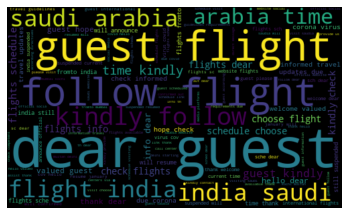

In [32]:
# word cloud visualization
allWords = ' '.join([twts for twts in saudia_airlines_en['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [153]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [154]:
saudia_airlines_en['Analysis'] = saudia_airlines_en['Polarity'].apply(getAnalysis)
# Show the dataframe
saudia_airlines_en

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet_id,created_at,text,likes,retweeted,location,language,airline,Subjectivity,Polarity,Analysis
14,1335393841810202624,2020-12-06 01:21:16,"43723700 Dear guest, there is no flight from I...",1,False,Saudi Arabia,en,Saudi_airlines,0.900,0.600,Positive
23,1335337522738720770,2020-12-05 21:37:29,"Hello dear guest, we hope you check and be in...",1,False,Saudi Arabia,en,Saudi_airlines,0.375,-0.125,Negative
29,1335334320014315521,2020-12-05 21:24:45,"Hello dear guest, please provide us with the ...",0,False,Saudi Arabia,en,Saudi_airlines,0.400,0.100,Positive
38,1335322063851167748,2020-12-05 20:36:03,"60633858 Dear guest, there is no flight from I...",1,False,Saudi Arabia,en,Saudi_airlines,0.000,0.000,Neutral
43,1335314759588122626,2020-12-05 20:07:02,"79348 Hello dear guest, You can follow up the ...",1,False,Saudi Arabia,en,Saudi_airlines,0.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
3225,1320352707732000768,2020-10-25 13:13:11,"667949 Dear guest, Kindly check the flights sc...",0,False,Saudi Arabia,en,Saudi_airlines,0.900,0.600,Positive
3226,1320352682104729600,2020-10-25 13:13:05,"56730529 Dear guest, Kindly check the flights ...",0,False,Saudi Arabia,en,Saudi_airlines,0.900,0.600,Positive
3227,1320352661305237507,2020-10-25 13:13:00,"5 Dear guest, Kindly check the flights schedul...",0,False,Saudi Arabia,en,Saudi_airlines,0.900,0.600,Positive
3229,1320339013727899648,2020-10-25 12:18:46,58724090 Once the flights resumed it will show...,0,False,Saudi Arabia,en,Saudi_airlines,0.000,0.000,Neutral


In [30]:
#Sentiment Analysis

#def percentage(part,whole):
    #return 100 * float(part)/float(whole) 

#keyword = "flynas"
#noOfTweet = 100



#tweets = tweepy.Cursor(api.search, q=keyword, lang = "en", since = "2019-09-01" ).items(noOfTweet)

# transform it to FUNCTION
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in saudia_airlines_en["text"]:
    
    #print(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

#positive = percentage(positive, noOfTweet)
#negative = percentage(negative, noOfTweet)
#neutral = percentage(neutral, noOfTweet)
#polarity = percentage(polarity, noOfTweet)
#positive = format(positive, '.1f')
#negative = format(negative, '.1f')
#neutral = format(neutral, '.1f')

In [31]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))


total number:  1464
positive number:  1429
negative number:  28
neutral number:  7
